In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- question 1

##### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [2]:
review = pd.read_csv("pageviews.csv")

In [3]:
review.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
review.dtypes

date     object
value     int64
dtype: object

In [5]:
review["date"] = pd.to_datetime(review["date"])

In [6]:
review.dtypes

date     datetime64[ns]
value             int64
dtype: object

- question 2

##### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
review.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [8]:
review.shape

(1304, 2)

In [9]:
review = review[(review.value >= review.value.quantile(0.025)) & (review.value <= review.value.quantile(0.975))]

In [10]:
review.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [11]:
review.shape

(1238, 2)

- question 3

##### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [41]:
def draw_line_plot():
    plt.figure(figsize=(15,5))
    sns.lineplot(data=review, x ="date", y = "value")
    plt.xlabel('Date')
    plt.ylabel('Page_Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

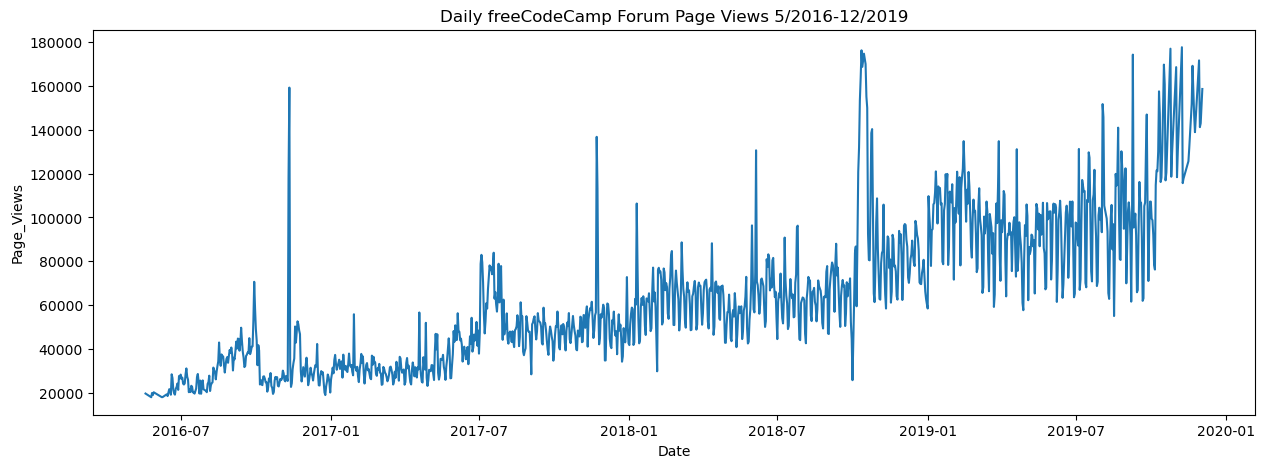

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data=review, x ="date", y = "value")
plt.xlabel('Date')
plt.ylabel('Page_Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

- question 4

###### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [13]:
review.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [14]:
review['date'].dt.year

10      2016
17      2016
18      2016
19      2016
20      2016
        ... 
1294    2019
1299    2019
1300    2019
1301    2019
1303    2019
Name: date, Length: 1238, dtype: int32

In [15]:
review['year'] = review['date'].dt.year

In [16]:
review.head()

,date,value,year
10,2016-05-19,19736,2016
17,2016-05-26,18060,2016
18,2016-05-27,19997,2016
19,2016-05-28,19044,2016
20,2016-05-29,20325,2016


In [17]:
review['date'].dt.month

10       5
17       5
18       5
19       5
20       5
        ..
1294    11
1299    11
1300    11
1301    12
1303    12
Name: date, Length: 1238, dtype: int32

In [18]:
review['month'] = review['date'].dt.month

In [19]:
review.head()

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5


In [43]:
def draw_bar_plot():
    plt.figure(figsize=(15,5))
    months=['January','February','March','April','May','June','July','August','September','October','November','December']
    sns.barplot(data=review, x ="year", y = "value", hue = 'month', hue_order = months, ci = None)
    plt.xlabel('year')
    plt.ylabel('Page Views')
    plt.title('Average Daily Page Views')
    plt.legend(months, bbox_to_anchor=(1,1))
    
    plt.show()


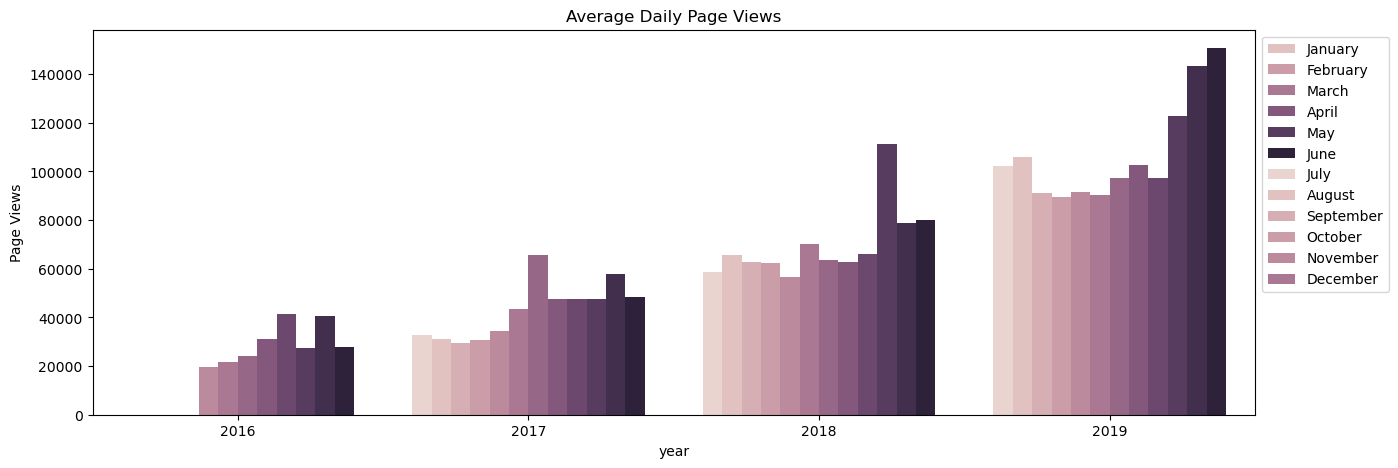

In [37]:
plt.figure(figsize=(15,5))
months=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=review, x ="year", y = "value", hue = 'month', hue_order = months, ci = None)
plt.xlabel('year')
plt.ylabel('Page Views')
plt.title('Average Daily Page Views')
plt.legend(months, bbox_to_anchor=(1,1))

plt.show()

- question 5

##### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [46]:
def draw_box_plot():
    ig, ax=plt.subplots(1,2,figsize=(14,6))
    sns.boxplot(data=review,x = 'year', y = 'value',ax = ax[0])
    ax[0].set(xlabel='Year',ylabel='Page Views',title='Year-wise Box Plot (Trend)')
    
    sns.boxplot(data=review,x = 'month', y = 'value',ax = ax[1])
    ax[1].set(xlabel='Month',ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')
    plt.show()

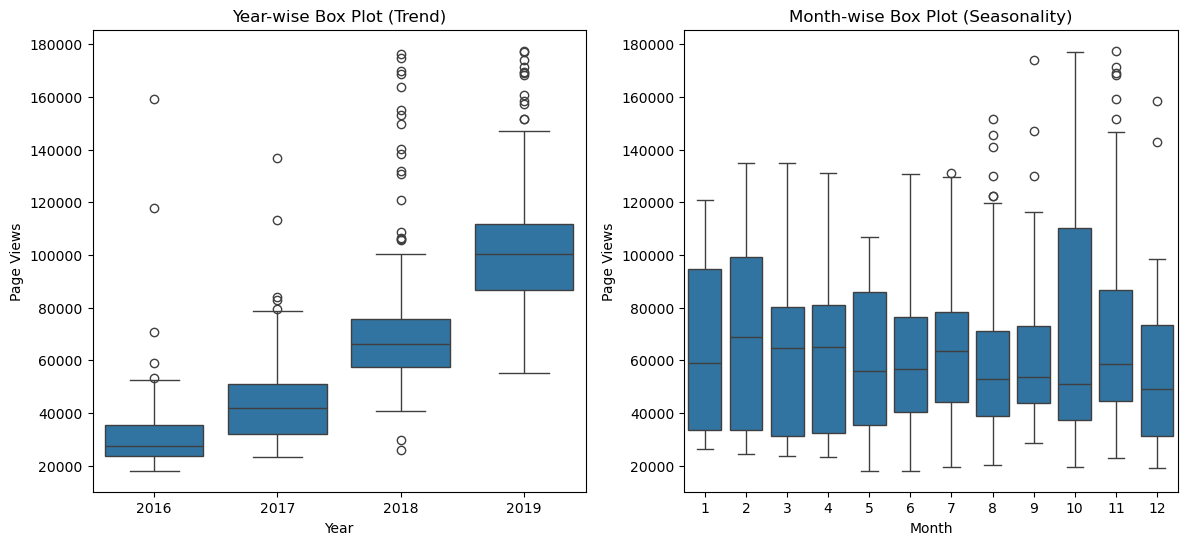

In [40]:
fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(data=review,x = 'year', y = 'value',ax = ax[0])
ax[0].set(xlabel='Year',ylabel='Page Views',title='Year-wise Box Plot (Trend)')

sns.boxplot(data=review,x = 'month', y = 'value',ax = ax[1])
ax[1].set(xlabel='Month',ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')
plt.show()